In [1]:
#Dataframe
import yaml
import pandas as pd
import numpy as np

pd.options.display.max_seq_items = 3000000
#Viz
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [91]:
def read_config(file_path='./config.yaml'):
    """Reads configuration file
    Args:
        file_path (str, optional): file path
    Returns:
        dict: Parsed configuration file
    """
    with open(file_path, "r") as f:
        return yaml.safe_load(f)

def get_data(file_path=None, nrows=None):
    """Loads data
    Args:
        file_path (str, optional): file path of dataset
            By default load data set from static web page
        nrows (int, optional): number or rows to loads from dataset
            By default loads all dataset  
    Returns:
        dataframe: output dataframe
    """
    if file_path is None:
        cfg = read_config()
        file_path = cfg['paths']['eng_dataset']
    print("Reading dataset ...")    
    return pd.read_csv(file_path,sep="\t", encoding="utf-8",
                       nrows=nrows, low_memory=False)

if __name__ == "__main__":
    data = get_data(file_path = "datas_reste_non_num_a_traiter2.csv", nrows = 1500000)
    print(f"data set shape is {data.shape}")

Reading dataset ...
data set shape is (1500000, 166)


In [92]:
data.describe()

,serving_quantity,additives_n,nutriscore_score,nova_group,ecoscore_score,product_quantity,unique_scans_n,completeness,energy-kj_100g,energy-kcal_100g,...,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,fruits-vegetables-rate_100g
count,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,...,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06
mean,7.551183e+01,1.387186e+00,9.540753e+00,3.694790e+00,6.285051e+01,3.223770e+02,1.576099e+00,4.896016e-01,9.983474e+02,2.622148e+02,...,9.540760e+00,1.783005e+01,5.486194e+01,1.475000e+00,8.781691e-02,5.145784e-02,1.508932e+00,2.797726e-02,1.157740e-02,3.685064e+01
std,7.610503e+01,1.807892e+00,5.899314e+00,7.466261e-01,1.707456e+01,5.308059e+02,4.248563e+00,2.045902e-01,4.789488e+02,1.797718e+02,...,5.899321e+00,9.060088e-01,1.126069e+01,2.664536e-15,1.754763e-01,7.780011e-01,1.250521e+00,6.138499e-02,3.755475e-03,9.827268e+00
min,0.000000e+00,0.000000e+00,-1.500000e+01,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e-01,0.000000e+00,0.000000e+00,...,-1.500000e+01,1.300000e+01,1.400000e+01,1.475000e+00,0.000000e+00,0.000000e+00,4.000000e-01,2.000000e-03,8.000000e-04,2.500000e+01
25%,5.100000e+01,1.000000e+00,1.000000e+01,4.000000e+00,6.000000e+01,2.500000e+02,1.000000e+00,3.625000e-01,9.570000e+02,1.020000e+02,...,1.000000e+01,1.800000e+01,5.935000e+01,1.475000e+00,7.350000e-02,1.655000e-05,1.200000e+00,2.800000e-02,1.100000e-02,2.500000e+01
50%,5.700000e+01,1.000000e+00,1.000000e+01,4.000000e+00,7.100000e+01,2.500000e+02,1.000000e+00,4.625000e-01,9.570000e+02,2.589286e+02,...,1.000000e+01,1.800000e+01,5.935000e+01,1.475000e+00,7.350000e-02,5.560000e-05,1.200000e+00,2.800000e-02,1.100000e-02,4.500000e+01
75%,5.700000e+01,1.000000e+00,1.000000e+01,4.000000e+00,7.100000e+01,3.000000e+02,1.000000e+00,5.750000e-01,9.570000e+02,3.880000e+02,...,1.000000e+01,1.800000e+01,5.935000e+01,1.475000e+00,7.350000e-02,5.560000e-05,1.200000e+00,2.800000e-02,1.100000e-02,4.500000e+01
max,5.000000e+03,1.500000e+01,4.000000e+01,4.000000e+00,1.250000e+02,8.000000e+04,8.420000e+02,1.100000e+00,3.700000e+03,9.000000e+02,...,4.000000e+01,1.800000e+01,5.935000e+01,1.475000e+00,4.550000e+00,5.160000e+01,2.000000e+01,7.500000e+01,5.720000e-01,4.500000e+01


## Data Cleaning

In [93]:
## Changing format of object and float64 columns

new_dtypes = {}

# object -> category (if nb unique < half total nb of rows and not XXX_100g)
for col in data.columns.values:
    if data[col].dtype == 'object' :
      if len(data[col].unique()) / len(data[col]) < 0.5:
        new_dtypes[col] = 'category'
      else:
        new_dtypes[col] = 'object'

# float64 -> float32
for col in data.columns.values:
    if data[col].dtype == 'float64':
      if data[col].notna().sum()!=0: # 1% sample columns happening to be all null 
        new_dtypes[col] = 'float32'

# int64 -> int8
for col in data.columns.values:
    if data[col].dtype == 'int64':
        new_dtypes[col] = 'int8'
        
print(new_dtypes)

{'code': 'object', 'url': 'object', 'product_name': 'object', 'abbreviated_product_name': 'category', 'generic_name': 'category', 'quantity': 'category', 'packaging_en': 'category', 'packaging_text': 'category', 'brands': 'category', 'categories_en': 'category', 'origins_en': 'category', 'manufacturing_places': 'category', 'labels_en': 'category', 'emb_codes': 'category', 'first_packaging_code_geo': 'category', 'cities_tags': 'category', 'purchase_places': 'category', 'stores': 'category', 'countries_en': 'category', 'ingredients_text': 'category', 'ingredients_analysis_tags': 'category', 'allergens': 'category', 'traces_en': 'category', 'serving_size': 'category', 'no_nutrition_data': 'category', 'additives_en': 'category', 'nutriscore_grade': 'category', 'pnns_groups_1': 'category', 'pnns_groups_2': 'category', 'food_groups_en': 'category', 'states_en': 'category', 'brand_owner': 'category', 'ecoscore_grade': 'category', 'nutrient_levels_tags': 'category', 'owner': 'category', 'data_

In [94]:
## Forcing XXX_100g and nutriscore columns to 'float32' and nova to 'object'

X_100g_cols = data.columns[data.columns.str.contains('_100g')]
for col in X_100g_cols:
    new_dtypes[col] = 'float32'

In [96]:
desc = data.describe(include='all')

In [97]:
# Checking columns in df

for i, c in enumerate(data.columns):
    print('\n'+c if i % 6 == 0 else c, end=' | ')


code | url | product_name | abbreviated_product_name | generic_name | quantity | 
packaging_en | packaging_text | brands | categories_en | origins_en | manufacturing_places | 
labels_en | emb_codes | first_packaging_code_geo | cities_tags | purchase_places | stores | 
countries_en | ingredients_text | ingredients_analysis_tags | allergens | traces_en | serving_size | 
serving_quantity | no_nutrition_data | additives_n | additives_en | nutriscore_score | nutriscore_grade | 
nova_group | pnns_groups_1 | pnns_groups_2 | food_groups_en | states_en | brand_owner | 
ecoscore_score | ecoscore_grade | nutrient_levels_tags | product_quantity | owner | data_quality_errors_tags | 
unique_scans_n | popularity_tags | completeness | main_category_en | image_small_url | image_ingredients_small_url | 
image_nutrition_small_url | energy-kj_100g | energy-kcal_100g | energy_100g | energy-from-fat_100g | fat_100g | 
saturated-fat_100g | butyric-acid_100g | caproic-acid_100g | caprylic-acid_100g | capric-

## Features Selection

1.1 Empty Columns 

In [99]:


# Checking nb of not null values in the columns

nb_not_null = pd.DataFrame((~data.isna()).sum(axis =0), columns=['nb'])
nb_not_null.sort_values(by=['nb'], axis=0, ascending=True, inplace=True)
nb_not_null.T.head(150)



,abbreviated_product_name,packaging_text,no_nutrition_data,owner,first_packaging_code_geo,cities_tags,origins_en,data_quality_errors_tags,emb_codes,generic_name,...,eicosapentaenoic-acid_100g,alpha-linolenic-acid_100g,omega-3-fat_100g,polyunsaturated-fat_100g,monounsaturated-fat_100g,unsaturated-fat_100g,melissic-acid_100g,montanic-acid_100g,omega-9-fat_100g,fruits-vegetables-rate_100g
nb,7227,16064,29032,36013,59985,64546,81936,83863,104568,107249,...,1500000,1500000,1500000,1500000,1500000,1500000,1500000,1500000,1500000,1500000


In [108]:
# Displaying a table with bins
mask = pd.cut(nb_not_null['nb'], [-1,0,5,10,100,300,10000,2000000]) # 
mask.value_counts(normalize=False, sort=False)



(-1, 0]               0
(0, 5]                0
(5, 10]               0
(10, 100]             0
(100, 300]            0
(300, 10000]          1
(10000, 2000000]    165
Name: nb, dtype: int64

In [67]:
# Changing the name of some of the columns

data.rename(columns={'nutriscore_score': 'nutriscore',
                   'nutriscore_grade': 'nutrigrade',
                    'traces_en' : 'traces',
                     'labels_en' : 'labels',
                   'pnns_groups_1': 'pnns1',
                   'pnns_groups_2': 'pnns2',
                   'nutrition_score_fr_100g':'nutriscore_fr'},
          inplace=True)



In [114]:
# Changing the name of some of the columns

data.rename(columns={'countries_en': 'countries',
                     'packaging_en' : 'packaging',
                   'additives_en': 'additives',
                   'main_category_en': 'main_category',
                     'brand_owner' : 'brands',
                   'categories_en': 'categories',
                   'nutrition_score_fr_100g':'nutriscore_fr'},
          inplace=True)

## Redundancy of features 

In [115]:


# Comparing filled values in two columns
''' returns indices where both are filled, or first only, or second, or none'''

def comp_df (df, col1, col2, print_option):
  m_both = (~df[[col1,col2]].isna()).sum(axis=1)==2 # mask for both cells filled
  m_one = (~df[[col1,col2]].isna()).sum(axis=1)==1 # mask for only one cell filled
  m_col1 = m_one & ~df[col1].isna() # mask for only col1 cell filled
  m_col2 = m_one & ~df[col2].isna() # mask for only col2 cell filled
  mnone = ~m_one & ~m_both
  ind_both = df.index[m_both].to_list()
  ind_col1 = df.index[m_col1].to_list()
  ind_col2 = df.index[m_col2].to_list()
  ind_none = df.index[mnone].to_list()
  if print_option :
    print("nb rows both filled: ", len(ind_both))
    print("nb rows with only", col1, "filled: ", len(ind_col1))
    print("nb rows with only", col2, "filled: ", len(ind_col2))
    print("nb rows not filled: ", len(ind_none))
  else:
    pass
  return(ind_both, ind_col1, ind_col2, ind_none)



In [116]:
data.filter(like = 'packaging')

,packaging,packaging_text,first_packaging_code_geo
0,unknown,NaN,NaN
1,unknown,NaN,NaN
2,unknown,NaN,NaN
3,unknown,NaN,NaN
4,unknown,NaN,NaN
...,...,...,...
1499995,unknown,NaN,NaN
1499996,unknown,NaN,NaN
1499997,unknown,NaN,NaN
1499998,unknown,NaN,NaN


In [121]:


# Printing result of comparison in each case:

li_col = ['packaging','brands', 'categories', 
        'labels', 'countries', 'traces','packaging']
for c in li_col:
  c1 = c
  c2 = c+'_text'
  print('COLUMN', c,':')
  t_ind = comp_df(data, c1, c2, True)
  df.loc[t_ind[1], [c1,c2]] = np.nan



COLUMN packaging :
nb rows both filled:  16064
nb rows with only packaging filled:  1483936
nb rows with only packaging_text filled:  0
nb rows not filled:  0


NameError: name 'df' is not defined

## Categorial Features

In [78]:
cols = ['brands', 'packaging', 'labels', 'additives',
        'allergens', 'main_category_en', 'categories','pnns2', 'pnns1']

FileNotFoundError: [Errno 2] No such file or directory: '/image/C_2_0_cat_nb_vs_freq_thr.png'

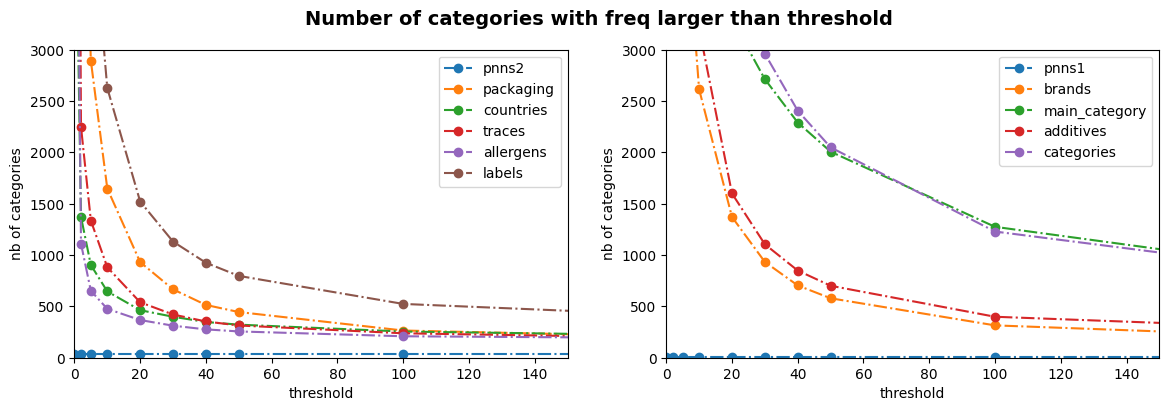

In [80]:
# Checking lower number of occurences in cat columns

fig, axs = plt.subplots(1,2)
thresh = [0,2,5,10,20,30,40,50,100,250,500,1000,5000]

for i, c in enumerate(['pnns2', 'packaging', 'countries',\
                      'traces',  'allergens', 'labels']):
    ser = data[c].value_counts()
    axs[0].plot(thresh, np.array([len(ser[ser>t]) for t in thresh])+(i*30),
             label=c, marker='o', ls='-.')
    
for i, c in enumerate(['pnns1', 'brands','main_category','additives',\
                      'categories']):
    ser = data[c].value_counts()
    axs[1].plot(thresh, np.array([len(ser[ser>t]) for t in thresh])+(i*30),
             label=c, marker='o', ls='-.')

[(ax.set_xlabel('threshold'),ax.set_ylabel('nb of categories')) for ax in axs];
[ax.set(xlim=(0,150), ylim=(0,3000)) for ax in axs];
[ax.legend() for ax in axs];

fig.suptitle('Number of categories with freq larger than threshold',
             fontweight='bold', fontsize=14)
plt.gcf().set_size_inches(14,4)
plt.savefig('/image/C_2_0_cat_nb_vs_freq_thr.png', dpi=400);
plt.show()